# Outline For Project
1. Input three integers $p,q,r$. These define the polynomal:
$\lambda^3 + -p\lambda^{n-1} + q\lambda + r = 0$
2. Find the perron root for the given polynomail.
3. Using this root, construct the free group (and the resulting three parallelograms) given by: 
$F(a,b,c)$ where $a=1$, $b=\lambda$, $c = \lambda^2$.
4. Solve for the endomorphism $\phi (F(a))$:
5. Use this endomorphism to approximate the three translation-self-similar tiles (and graph them).

In [6]:
import numpy as np

In [7]:
def complex_modulus(numb):
    return sqrt( imag(numb)**2+real(numb)**2 )

def find_lambda(p,q,r,n=3):
    #Not currently interested in testing n > 3
    assert (min(p,q,r-1) >= 0 ) ,"Invalid Inputs"
    f(l) = l**n - p*l**(n-1) + q*l + r
    max_modulus = 0
    for root in solve(f,l,solution_dict=True):
        print('*'*20)
        print(root)
        if complex_modulus(root[l]) > max_modulus:
            max_modulus = complex_modulus
            complex_perron = root[l]
    return f(l), complex_perron
    
def create_freeGroup(l):
    return [1,l,l*l]

In [8]:
def generate_poly(u,w):
    ux,uy =real(u), imag(u)
    wx,wy = real(w), imag(w)
    pts  = [(0,0),(ux,uy),(ux+wx,uy+wy),(wx,wy)]
    return pts, polygon(pts,fill=False)

In [9]:
def create_polys(freeGroup):
    poly_list = [generate_poly(freeGroup[0],freeGroup[1]),
                 generate_poly(freeGroup[1],freeGroup[2]),
                 generate_poly(freeGroup[0],freeGroup[2])]
    show( sum(poly_list),aspect_ratio=1 ) 
    return _, poly_list


In [10]:
class region:
    #attempting to track the evolution of this region by 
    #applying phi to the head of each vector. In a ccw motion.
    
    def __init__(self,l,*init_pts):
        #init_pts = [[(x1,y1),pt1_type],[(x2,y2),pt2_type], ...] 
        self.l = l    
        self.pts = []
        for init_pt in init_pts:
            self.pts.append( point(init_pt) )        
    
    def evolve(self):
        for pt in self.pts:
            if pt.py_type == 0:
                pt.loc = pt.loc * self.l
                pt.type = 1
                self.pts.append(point( pt.loc*self.l ,2))
            else:
                pt.loc = pt.loc * self.l
                pt.type += 1;
                pt.type = py.type % 3 #this could be generalized in the future
                
    def show_region(self):
        polygon(self.pts,aspect_ratio = 1,fill = False)
            
class point:
    #these are the points that make up the region.
    #We need to store their type and position.
    def __init__(self, (x, y), pt_type):
        self.pt_type = pt_type
        self.loc = np.array([x,y])


In [14]:
_,l = find_lambda(1,1,1)

********************
{l: -1/6*(3*sqrt(11)*sqrt(3) - 17)^(1/3)*(I*sqrt(3) + 1) + 1/3*(-I*sqrt(3) + 1)/(3*sqrt(11)*sqrt(3) - 17)^(1/3) + 1/3}
********************
{l: -1/6*(3*sqrt(11)*sqrt(3) - 17)^(1/3)*(-I*sqrt(3) + 1) - 1/3*(-I*sqrt(3) - 1)/(3*sqrt(11)*sqrt(3) - 17)^(1/3) + 1/3}
********************
{l: 1/3*(3*sqrt(11)*sqrt(3) - 17)^(1/3) - 2/3/(3*sqrt(11)*sqrt(3) - 17)^(1/3) + 1/3}


In [15]:
sides = create_freeGroup(l); sides

[1,
 -1/6*(3*sqrt(11)*sqrt(3) - 17)^(1/3)*(I*sqrt(3) + 1) + 1/3*(-I*sqrt(3) + 1)/(3*sqrt(11)*sqrt(3) - 17)^(1/3) + 1/3,
 1/36*((3*sqrt(11)*sqrt(3) - 17)^(1/3)*(I*sqrt(3) + 1) - 2*(-I*sqrt(3) + 1)/(3*sqrt(11)*sqrt(3) - 17)^(1/3) - 2)^2]

In [5]:
my_function, l = find_lambda(1,1,1); print('*'*20); l

********************
{l: -1/6*(3*sqrt(11)*sqrt(3) - 17)^(1/3)*(I*sqrt(3) + 1) + 1/3*(-I*sqrt(3) + 1)/(3*sqrt(11)*sqrt(3) - 17)^(1/3) + 1/3}
********************
{l: -1/6*(3*sqrt(11)*sqrt(3) - 17)^(1/3)*(-I*sqrt(3) + 1) - 1/3*(-I*sqrt(3) - 1)/(3*sqrt(11)*sqrt(3) - 17)^(1/3) + 1/3}
********************
{l: 1/3*(3*sqrt(11)*sqrt(3) - 17)^(1/3) - 2/3/(3*sqrt(11)*sqrt(3) - 17)^(1/3) + 1/3}
********************


-1/6*(3*sqrt(11)*sqrt(3) - 17)^(1/3)*(I*sqrt(3) + 1) + 1/3*(-I*sqrt(3) + 1)/(3*sqrt(11)*sqrt(3) - 17)^(1/3) + 1/3

In [6]:
my_function

l^3 - l^2 + l + 1

In [7]:
freeGroup = create_freeGroup(l)

for item in freeGroup:
    print('*'*10)
    print(item)

**********
1
**********
-1/6*(3*sqrt(11)*sqrt(3) - 17)^(1/3)*(I*sqrt(3) + 1) + 1/3*(-I*sqrt(3) + 1)/(3*sqrt(11)*sqrt(3) - 17)^(1/3) + 1/3
**********
1/36*((3*sqrt(11)*sqrt(3) - 17)^(1/3)*(I*sqrt(3) + 1) - 2*(-I*sqrt(3) + 1)/(3*sqrt(11)*sqrt(3) - 17)^(1/3) - 2)^2


In [10]:
freeGroup

[1,
 -1/6*(3*sqrt(11)*sqrt(3) - 17)^(1/3)*(I*sqrt(3) + 1) + 1/3*(-I*sqrt(3) + 1)/(3*sqrt(11)*sqrt(3) - 17)^(1/3) + 1/3,
 1/36*((3*sqrt(11)*sqrt(3) - 17)^(1/3)*(I*sqrt(3) + 1) - 2*(-I*sqrt(3) + 1)/(3*sqrt(11)*sqrt(3) - 17)^(1/3) - 2)^2]

In [11]:
sample = create_polys(freeGroup)

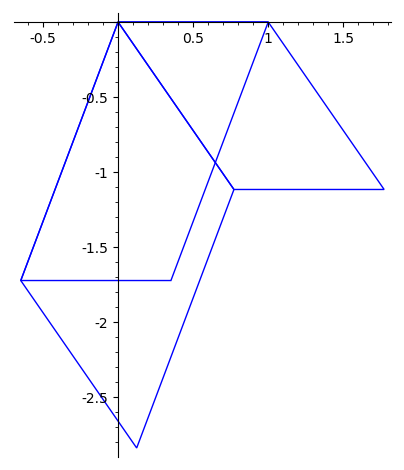

In [12]:
show( sum(sample) )

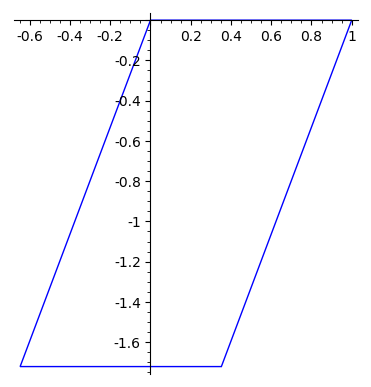

In [15]:
show ( sample[2] )

In [19]:
print(sample[2][0][1])

(1.0, 0.0)


In [103]:
u+u

[1.00000000000000, 2.00000000000000, 1.00000000000000, 2.00000000000000]

In [120]:
out = generate_poly(u,w)

In [135]:
l

-1/6*(3*sqrt(11)*sqrt(3) - 17)^(1/3)*(I*sqrt(3) + 1) + 1/3*(-I*sqrt(3) + 1)/(3*sqrt(11)*sqrt(3) - 17)^(1/3) + 1/3

In [21]:
[1,2]*[3,4]

TypeError: can't multiply sequence by non-int of type 'list'

In [24]:
l

-1/6*(3*sqrt(11)*sqrt(3) - 17)^(1/3)*(I*sqrt(3) + 1) + 1/3*(-I*sqrt(3) + 1)/(3*sqrt(11)*sqrt(3) - 17)^(1/3) + 1/3

In [25]:
freeGroup

[1,
 -1/6*(3*sqrt(11)*sqrt(3) - 17)^(1/3)*(I*sqrt(3) + 1) + 1/3*(-I*sqrt(3) + 1)/(3*sqrt(11)*sqrt(3) - 17)^(1/3) + 1/3,
 1/36*((3*sqrt(11)*sqrt(3) - 17)^(1/3)*(I*sqrt(3) + 1) - 2*(-I*sqrt(3) + 1)/(3*sqrt(11)*sqrt(3) - 17)^(1/3) - 2)^2]

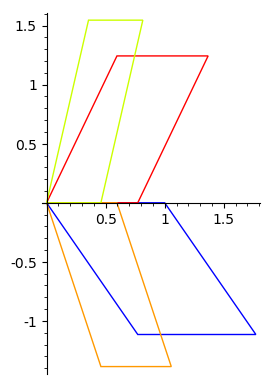

In [41]:
out = run_model(freeGroup[0],freeGroup[1],l)
show(out)

In [43]:
init_pts = []
init_pts.append()
test = region(l,)

In [47]:
test_pt = point((1,2),'a')
test_pt.loc

array([1, 2])

In [1]:
test= 0

In [5]:
for i in range(6):
    i += 1 
    i = i % 3
    print(i)

1
2
0
1
2
0
